<a href="https://colab.research.google.com/github/kharadevaibhav/Data-Analytics-Tasks/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/House_Price_Analysis_Dataset.csv')
df

,Property_ID,Listing_Date,Sale_Type,Location,BHK,Bathrooms,Square_Feet,Year_Built,Price,Rating,Review_Count,Has_Parking,Has_Garden,Has_Security,Nearby_Schools,Nearby_Hospitals,Latitude,Longitude
0,P100000,2020-11-13,Commercial,Bangalore,5,4,717,1997,8317872,2,13,No,Yes,No,3,8,28.931374,69.273158
1,P100001,2024-04-28,Private,Kolkata,5,1,1267,2012,9417637,5,23,Yes,Yes,No,1,7,30.232230,84.776643
2,P100002,2020-08-16,Commercial,Ahmedabad,2,3,3626,1994,1379374,3,75,No,Yes,Yes,7,4,27.841590,95.384835
3,P100003,2020-07-01,Commercial,Bangalore,4,2,793,2003,4711035,2,22,Yes,No,Yes,4,0,23.822021,94.298404
4,P100004,2024-01-06,Commercial,Pune,2,1,2952,2015,6486650,4,38,No,No,Yes,0,5,19.660073,88.609525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P109995,2023-02-03,Private,Lucknow,1,2,4368,2007,8184444,4,28,No,Yes,Yes,7,1,14.842495,79.380179
9996,P109996,2021-08-29,Commercial,Ahmedabad,5,2,2562,2006,1169088,2,94,No,Yes,Yes,6,7,22.850341,86.171274
9997,P109997,2024-04-30,Private,Hyderabad,3,4,3075,1989,2468504,1,2,Yes,No,Yes,3,5,36.439737,83.676095
9998,P109998,2023-09-18,Private,Pune,4,1,4732,1997,1245829,3,12,No,No,No,3,4,23.162848,68.993962


In [4]:
# Inspect data
print("Initial data info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Property_ID       10000 non-null  object 
 1   Listing_Date      10000 non-null  object 
 2   Sale_Type         10000 non-null  object 
 3   Location          10000 non-null  object 
 4   BHK               10000 non-null  int64  
 5   Bathrooms         10000 non-null  int64  
 6   Square_Feet       10000 non-null  int64  
 7   Year_Built        10000 non-null  int64  
 8   Price             10000 non-null  int64  
 9   Rating            10000 non-null  int64  
 10  Review_Count      10000 non-null  int64  
 11  Has_Parking       10000 non-null  object 
 12  Has_Garden        10000 non-null  object 
 13  Has_Security      10000 non-null  object 
 14  Nearby_Schools    10000 non-null  int64  
 15  Nearby_Hospitals  10000 non-null  int64  
 16  Latitude          1000

In [5]:
# Initial inspection
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Property_ID       10000 non-null  object 
 1   Listing_Date      10000 non-null  object 
 2   Sale_Type         10000 non-null  object 
 3   Location          10000 non-null  object 
 4   BHK               10000 non-null  int64  
 5   Bathrooms         10000 non-null  int64  
 6   Square_Feet       10000 non-null  int64  
 7   Year_Built        10000 non-null  int64  
 8   Price             10000 non-null  int64  
 9   Rating            10000 non-null  int64  
 10  Review_Count      10000 non-null  int64  
 11  Has_Parking       10000 non-null  object 
 12  Has_Garden        10000 non-null  object 
 13  Has_Security      10000 non-null  object 
 14  Nearby_Schools    10000 non-null  int64  
 15  Nearby_Hospitals  10000 non-null  int64  
 16  Latitude          10000 non-null  float64

In [6]:
# Calculate missing value percentage
missing_percent = df.isnull().mean() * 100
print("\nMissing value percentages:\n", missing_percent)



Missing value percentages:
 Property_ID         0.0
Listing_Date        0.0
Sale_Type           0.0
Location            0.0
BHK                 0.0
Bathrooms           0.0
Square_Feet         0.0
Year_Built          0.0
Price               0.0
Rating              0.0
Review_Count        0.0
Has_Parking         0.0
Has_Garden          0.0
Has_Security        0.0
Nearby_Schools      0.0
Nearby_Hospitals    0.0
Latitude            0.0
Longitude           0.0
dtype: float64


In [7]:
# Drop unwanted columns
df = df.drop(columns=["Property_ID"])

In [8]:
# Sort data by Listing_Date
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'])
df= df.sort_values(by='Listing_Date')

In [9]:
# Add columns for YOY and MOM analysis
df['Year'] = df['Listing_Date'].dt.year
df['Month'] = df['Listing_Date'].dt.month

<ipython-input-10-4158af376466>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sale_Type", data=df, palette="Set2")


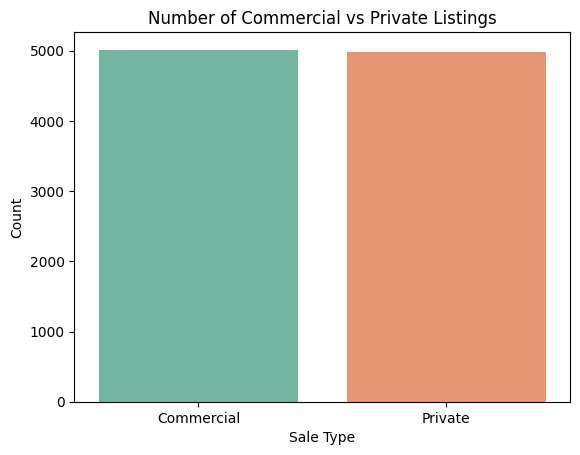

In [10]:
sns.countplot(x="Sale_Type", data=df, palette="Set2")
plt.title("Number of Commercial vs Private Listings")
plt.xlabel("Sale Type")
plt.ylabel("Count")
plt.show()

<ipython-input-26-be7c391ab776>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="Price", data=avg_price_location, palette="viridis")


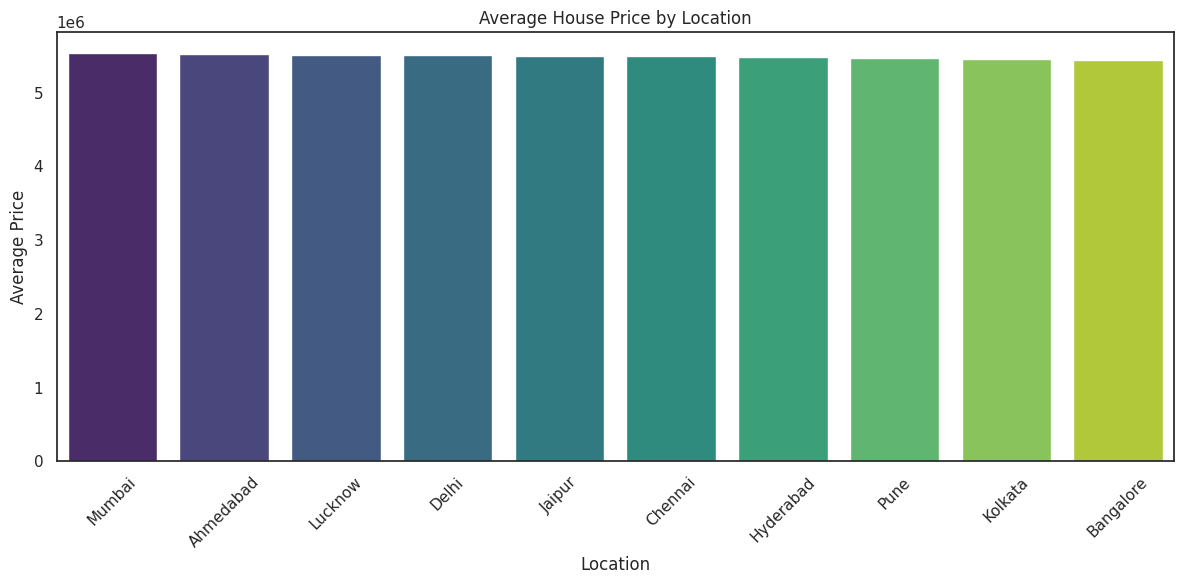

In [26]:
# Calculate average price per location
avg_price_location = df.groupby("Location")["Price"].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Location", y="Price", data=avg_price_location, palette="viridis")
plt.title("Average House Price by Location")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

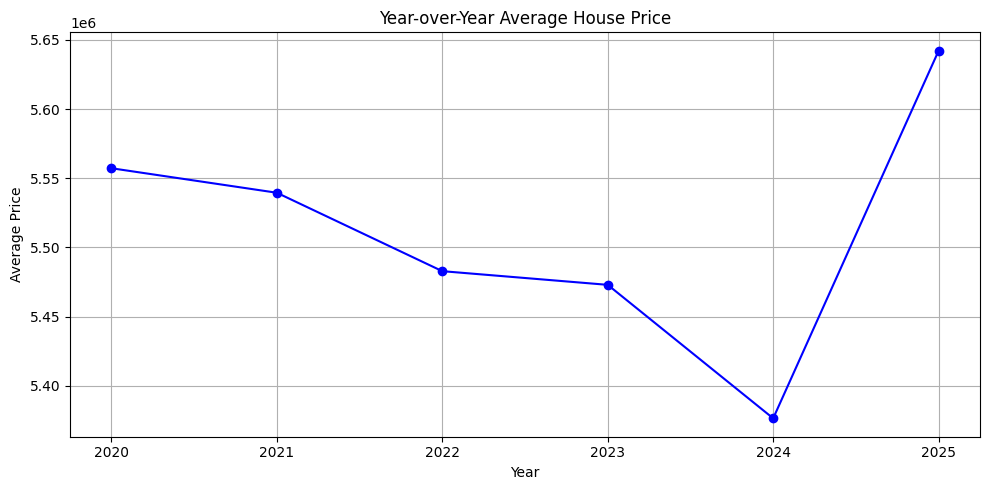

In [12]:
# Group by year and calculate average price
yearly_price = df.groupby("Year")["Price"].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(yearly_price["Year"], yearly_price["Price"], marker='o', linestyle='-', color='blue')
plt.title("Year-over-Year Average House Price")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Split the data based on Sale_Type
df_commercial = df[df["Sale_Type"] == "Commercial"]
df_private = df[df["Sale_Type"] == "Private"]


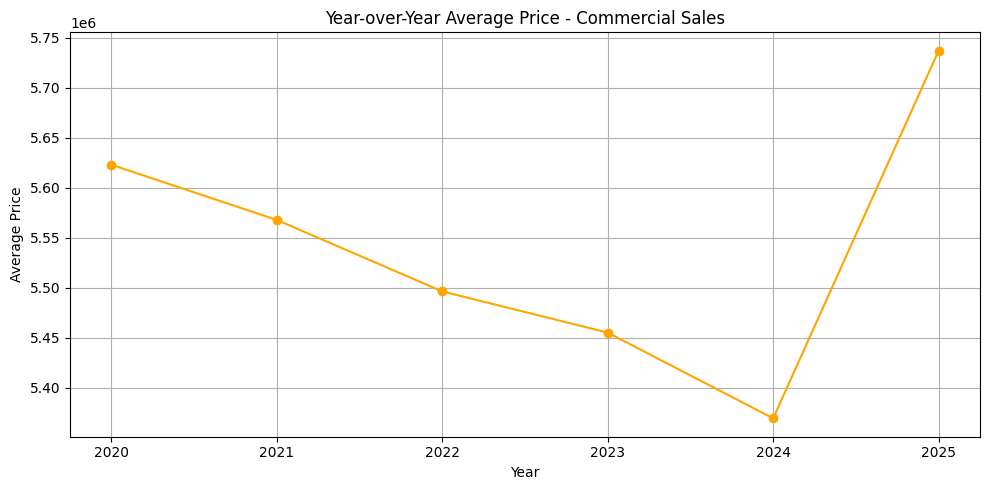

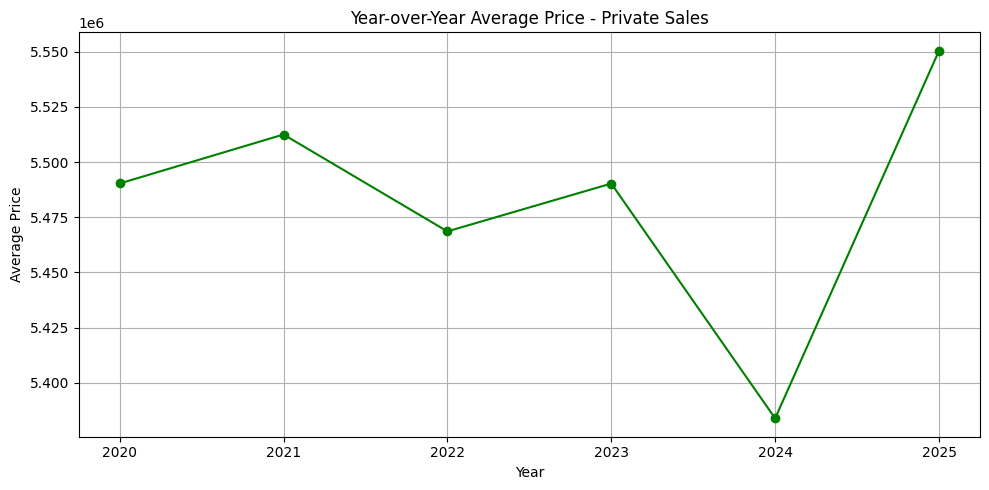

In [14]:
#Group by Year and calculate average Price for each Sale_Type
avg_price_commercial = df_commercial.groupby("Year")["Price"].mean().reset_index()
avg_price_private = df_private.groupby("Year")["Price"].mean().reset_index()

# Plot 1: Commercial
plt.figure(figsize=(10, 5))
plt.plot(avg_price_commercial["Year"], avg_price_commercial["Price"], marker='o', color='orange')
plt.title("Year-over-Year Average Price - Commercial Sales")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Private
plt.figure(figsize=(10, 5))
plt.plot(avg_price_private["Year"], avg_price_private["Price"], marker='o', color='green')
plt.title("Year-over-Year Average Price - Private Sales")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

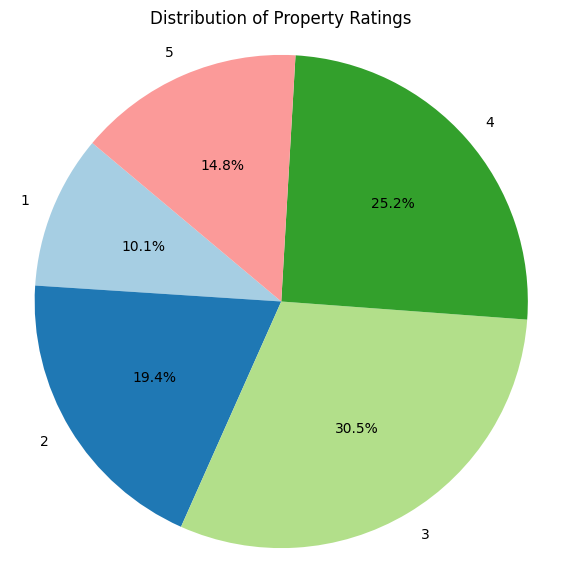

In [15]:
# Count how many properties fall into each rating
rating_counts = df["Rating"].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Ratings")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

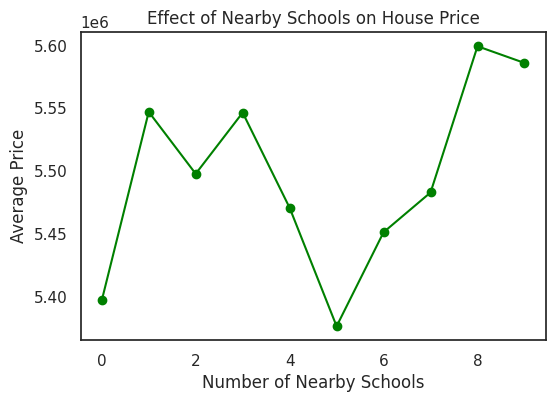

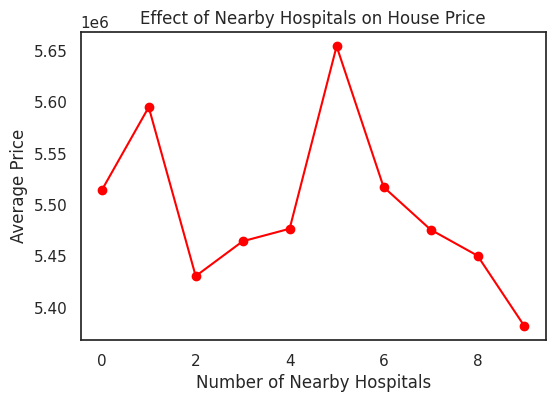

In [25]:
sns.set(style="white")
# Plot: Number of Schools vs Average Price
school_price = df.groupby("Nearby_Schools")["Price"].mean().reset_index()
plt.figure(figsize=(6,4))
plt.plot(school_price["Nearby_Schools"], school_price["Price"], marker='o', color='green')
plt.title("Effect of Nearby Schools on House Price")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Average Price")
plt.grid(False)

plt.show()

# Plot: Number of Hospitals vs Average Price
hospital_price = df.groupby("Nearby_Hospitals")["Price"].mean().reset_index()
plt.figure(figsize=(6,4))
plt.plot(hospital_price["Nearby_Hospitals"], hospital_price["Price"], marker='o', color='red')
plt.title("Effect of Nearby Hospitals on House Price")
plt.xlabel("Number of Nearby Hospitals")
plt.ylabel("Average Price")
plt.grid(False)
plt.show()


In [27]:
print("1. In the year-over-year trend, the average price of commercial property sales decreased from 2020 to 2024, but increased again in 2025.")
print("2. For private property sales, prices showed minimal fluctuations between 2020 and 2024, followed by an increase in 2025.")
print("3. In the ratings distribution, 3-star rated houses are the most common, followed by 4-star rated houses.")
print("4. There were no significant changes in the average house prices across all cities.")
print("5. The average house prices are not significantly affected by the presence of gardens, parking, nearby schools, or hospitals.")




1. In the year-over-year trend, the average price of commercial property sales decreased from 2020 to 2024, but increased again in 2025.
2. For private property sales, prices showed minimal fluctuations between 2020 and 2024, followed by an increase in 2025.
3. In the ratings distribution, 3-star rated houses are the most common, followed by 4-star rated houses.
4. There were no significant changes in the average house prices across all cities.
5. The average house prices are not significantly affected by the presence of gardens, parking, nearby schools, or hospitals.
